# Case Study: Studio GHI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.DataFrame({
    'X': [100, 200, 300, 400, 500, 550, 600, 650, 700, 750],
    'Y': [250000, 470000, 670000, 850000, 1010000, 1082500, 1150000, 1212500, 1270000, 1322500]
})

In [3]:
x = df['X'].to_numpy().reshape(-1,1)
y = df['Y'].to_numpy().reshape(-1,1)

model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

df['y_pred'] = y_pred

In [4]:
model.intercept_

array([149130.43478261])

In [5]:
model.coef_

array([[1641.30434783]])

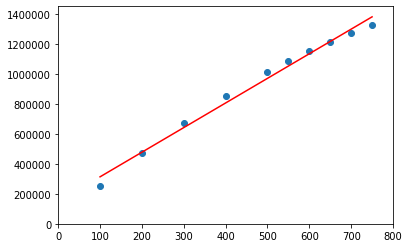

In [6]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.axis([0, 800, 0, 1_450_000])
plt.show()

According to sklearn, the line of best fit is:

$\Large{y\ =\ 149,130.435\ +\ 1,641.30x}$

This means that this line function gives us THE straight line with the least amount of error (Mean Squared Error).

In [7]:
print(f"The mean squared error is {mean_squared_error(y, y_pred):,.12}")

The mean squared error is 1,376,739,130.43


However, the above points are actually results of this function below:

$\Large{y\ =\ -x^{2}\ +\ 2,500x\ +\ 10,000}$

Let's plot the lines which fits perfectly with the data

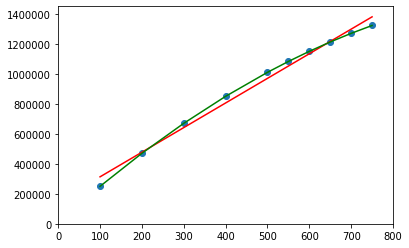

In [8]:
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')
plt.plot(x, -x**2 + 2500*x + 10_000 , color='green')
plt.axis([0, 800, 0, 1_450_000])
plt.show()

To add to the mix, let's also add a pink line ${y\ =\ 2500x }$ and get its MSE.

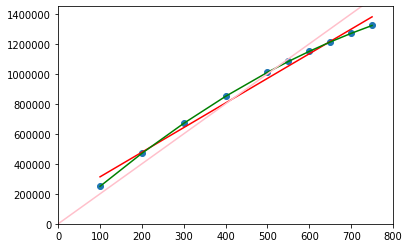

In [9]:
plt.scatter(x, y)

plt.plot(x, y_pred, color='red')
plt.plot(x, -x**2 + 2500*x + 10_000 , color='green')
plt.plot(list(range(800)), list(map(lambda x: 2000*x, range(800))), color='pink')
plt.axis([0, 800, 0, 1_450_000])
plt.show()

In [10]:
print(f"The mean squared error of the pink line is {mean_squared_error(y, 2000 * x):,.12}")

The mean squared error of the pink line is 7,376,875,000.0


## Cost Function

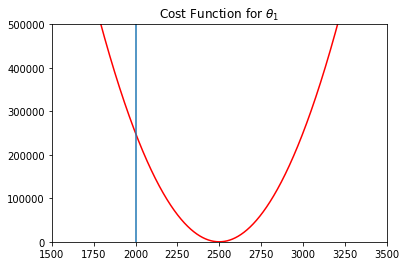

In [11]:
plt.plot(list(range(0, 3_500)), list(map(lambda x: (x-2500)**2, range(0, 3_500))), color='red')
plt.title('Cost Function for ${θ_{1}}$')
plt.axis([1500, 3500, 0, 500_000])

plt.axvline(x=2000)
plt.show()

## Polynomial Regression using sklearn

Let us take a look at how to do Polynomial Regression using sklearn.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

In [13]:
y2 = y.reshape(1,-1).flatten()

In [14]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', SGDRegressor(max_iter=100_000_000))
])
model2 = pipeline.fit(x, y2)

y_pred2 = model2.predict(x)

In [15]:
model2.named_steps['linear'].coef_

array([485284.68802021, 321862.39140596, -43099.58380264])

In [16]:
model2.named_steps['linear'].intercept_

array([486539.17810939])

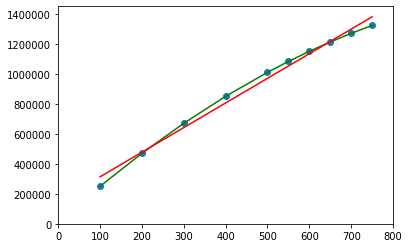

In [17]:
plt.scatter(x, y)
plt.plot(x, y_pred2, color='green')
plt.plot(x, y_pred, color='red')
plt.axis([0, 800, 0, 1_450_000])
plt.show()

In [18]:
mean_squared_error(y, y_pred2)

2067.2954227724704